In [1]:
# ---- Load Libraries ----
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ---- Load Data ----
url = "https://cwcgom.aoml.noaa.gov/erddap/griddap/noaa_aoml_9f9d_930a_255d"
ds = xr.open_dataset(url)

In [2]:
ds

<xarray.Dataset> Size: 49GB
Dimensions:          (time: 457, latitude: 3360, longitude: 2640)
Coordinates:
  * time             (time) datetime64[ns] 4kB 2024-04-09T12:00:00 ... 2025-0...
  * latitude         (latitude) float32 13kB 69.98 69.94 69.9 ... -69.94 -69.98
  * longitude        (longitude) float32 11kB -84.98 -84.94 ... 24.94 24.98
Data variables:
    prococcus_moana  (time, latitude, longitude) float32 16GB ...
    syncoccus_moana  (time, latitude, longitude) float32 16GB ...
    picoeuk_moana    (time, latitude, longitude) float32 16GB ...
Attributes: (12/71)
    _lastModified:                     2025-08-03T00:46:23.000Z
    cdm_data_type:                     Grid
    comment:                           This dataset is redistributed by Atlan...
    Conventions:                       CF-1.10, ACDD-1.3, COARDS
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    creator_name:                      NASA/GSFC/OBPG
    ...                                ...
    temporal_range:                    9-hour
    time_coverage_end:                 2025-08-03T12:00:00Z
    time_coverage_start:               2024-04-09T12:00:00Z
    title:                             OCI L3 SMI, PACE MOANA DAILY; via Atla...
    Westernmost_Easting:               -84.97916
    westernmost_longitude:             -85.0

In [10]:
# Code to compute monthly mean from daily data
import xarray as xr

# Subset to region
lat_bounds = (10, 30)
lon_bounds = (-25, -10)

ds_subset = ds.sel(
    latitude=slice(*sorted(lat_bounds, reverse=True)),  # descending lat
    longitude=slice(*sorted(lon_bounds))                # ascending lon
)

# Use strftime instead of to_period
ds_subset.coords["month"] = ds_subset.time.dt.strftime("%Y-%m")

# Group and average
monthly_mean = ds_subset.groupby("month").mean(dim="time")


AttributeError: 'Dataset' object has no attribute 'time'

In [4]:
monthly_mean.to_netcdf("monthly_mean_subset.nc", compute=True)

In [5]:
monthly_mean

<xarray.Dataset> Size: 35MB
Dimensions:          (month: 17, latitude: 480, longitude: 360)
Coordinates:
  * latitude         (latitude) float32 2kB 29.98 29.94 29.9 ... 10.06 10.02
  * longitude        (longitude) float32 1kB -24.98 -24.94 ... -10.06 -10.02
  * month            (month) object 136B '2024-04' '2024-05' ... '2025-08'
Data variables:
    prococcus_moana  (month, latitude, longitude) float32 12MB 1.252e+05 ... nan
    syncoccus_moana  (month, latitude, longitude) float32 12MB 4.755e+03 ... nan
    picoeuk_moana    (month, latitude, longitude) float32 12MB 966.2 ... nan
Attributes: (12/71)
    _lastModified:                     2025-08-03T00:46:23.000Z
    cdm_data_type:                     Grid
    comment:                           This dataset is redistributed by Atlan...
    Conventions:                       CF-1.10, ACDD-1.3, COARDS
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    creator_name:                      NASA/GSFC/OBPG
    ...                                ...
    temporal_range:                    9-hour
    time_coverage_end:                 2025-08-03T12:00:00Z
    time_coverage_start:               2024-04-09T12:00:00Z
    title:                             OCI L3 SMI, PACE MOANA DAILY; via Atla...
    Westernmost_Easting:               -84.97916
    westernmost_longitude:             -85.0

/tmp/ipykernel_4896/2181213336.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


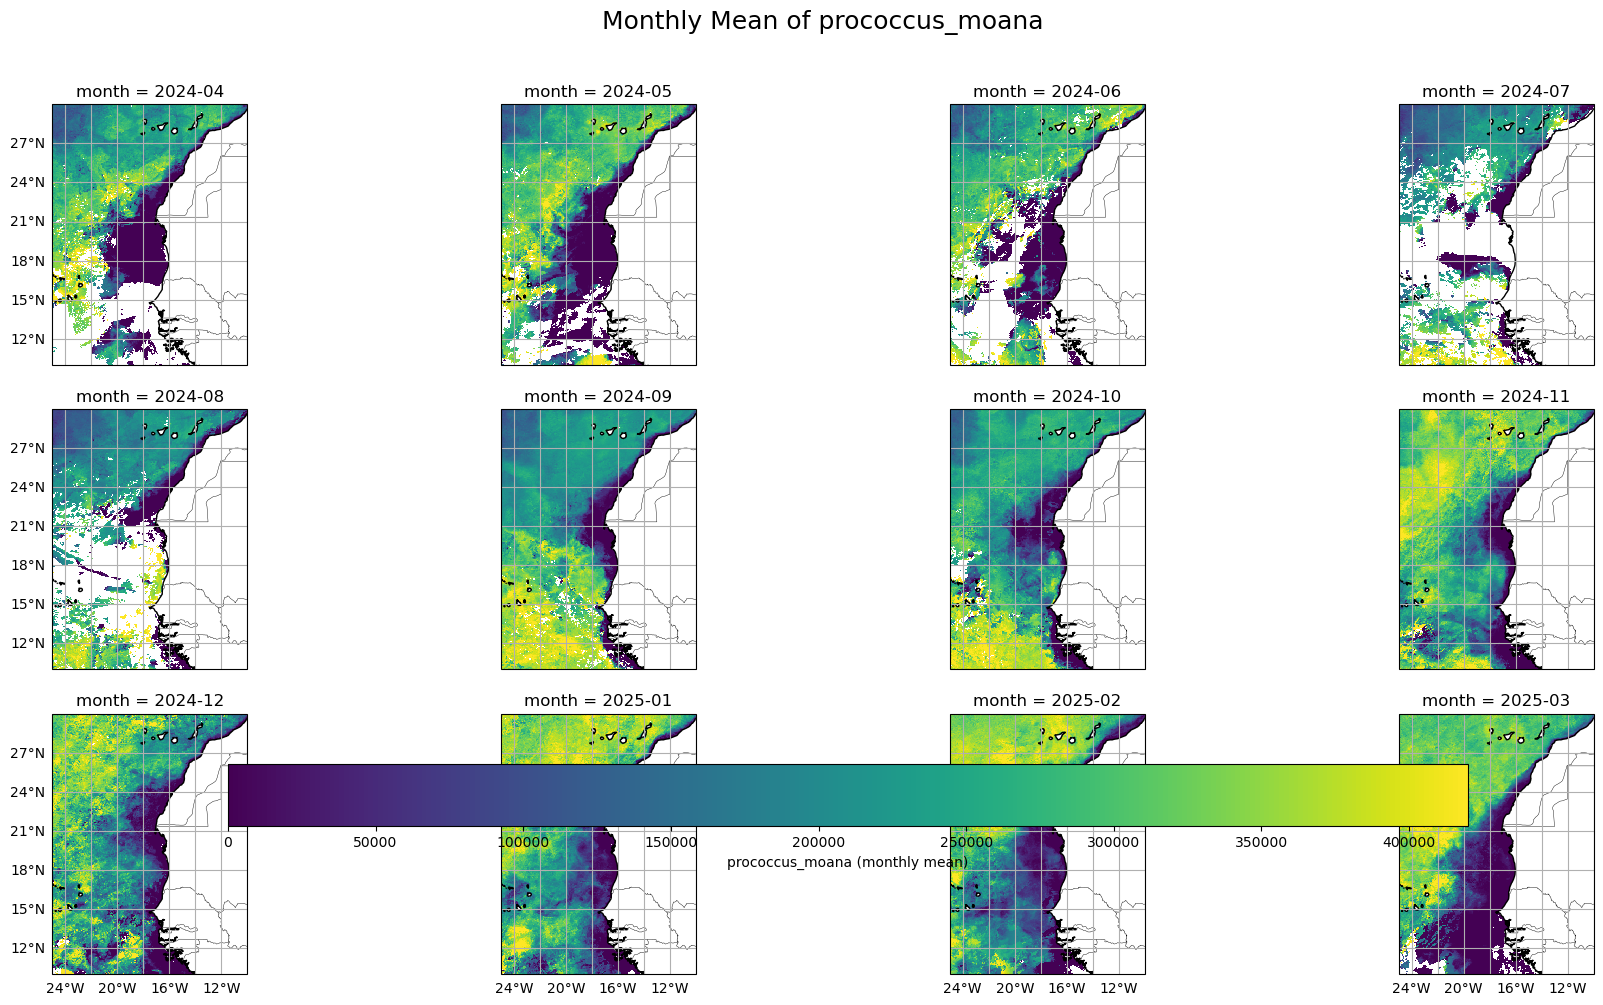

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar

# ---- Settings ----
variable = "prococcus_moana"
ds = monthly_mean  # your Dataset with time dimension labeled as datetime (not strings)

# ---- Create figure and axes ----
fig, axs = plt.subplots(3, 4, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

# ---- Loop over months ----
for i, ax in enumerate(axs):
    # Select month i (0-based index)
    if i < len(ds.month):
        month_data = ds[variable].isel(month=i)

        ax.set_title(calendar.month_name[i + 1])
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linewidth=0.3)
        gl = ax.gridlines(draw_labels=True)
        gl.top_labels = gl.right_labels = False
        gl.bottom_labels = i > 7
        gl.left_labels = i % 4 == 0
        gl.right_labels = False

        img = month_data.plot(
            ax=ax,
            cmap="viridis",
            robust=True,
            add_colorbar=False
        )
    else:
        ax.set_visible(False)

# ---- Add one colorbar for all ----
cbar = plt.colorbar(img, ax=axs, orientation='horizontal', pad=0.05, shrink=0.8)
cbar.set_label(f"{variable} (monthly mean)")

plt.suptitle(f"Monthly Mean of {variable}", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/tmp/ipykernel_4896/941966045.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


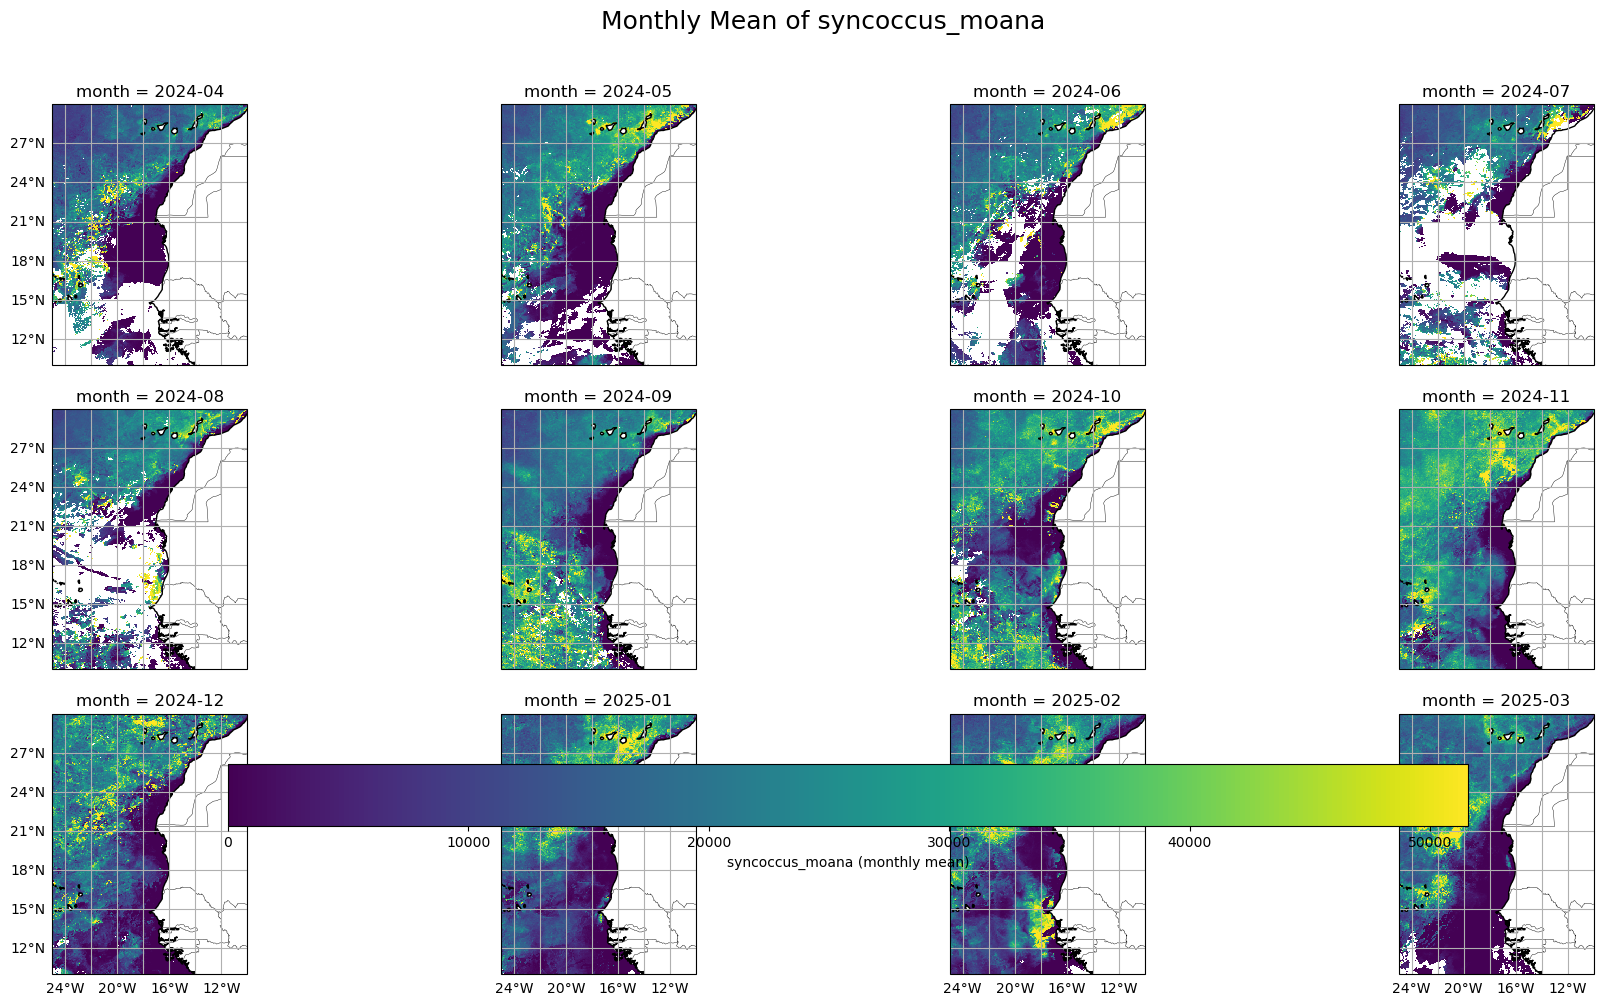

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar

# ---- Settings ----
variable = "syncoccus_moana"
ds = monthly_mean  # your Dataset with time dimension labeled as datetime (not strings)

# ---- Create figure and axes ----
fig, axs = plt.subplots(3, 4, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

# ---- Loop over months ----
for i, ax in enumerate(axs):
    # Select month i (0-based index)
    if i < len(ds.month):
        month_data = ds[variable].isel(month=i)

        ax.set_title(calendar.month_name[i + 1])
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linewidth=0.3)
        gl = ax.gridlines(draw_labels=True)
        gl.top_labels = gl.right_labels = False
        gl.bottom_labels = i > 7
        gl.left_labels = i % 4 == 0
        gl.right_labels = False

        img = month_data.plot(
            ax=ax,
            cmap="viridis",
            robust=True,
            add_colorbar=False
        )
    else:
        ax.set_visible(False)

# ---- Add one colorbar for all ----
cbar = plt.colorbar(img, ax=axs, orientation='horizontal', pad=0.05, shrink=0.8)
cbar.set_label(f"{variable} (monthly mean)")

plt.suptitle(f"Monthly Mean of {variable}", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/tmp/ipykernel_4896/3464896870.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


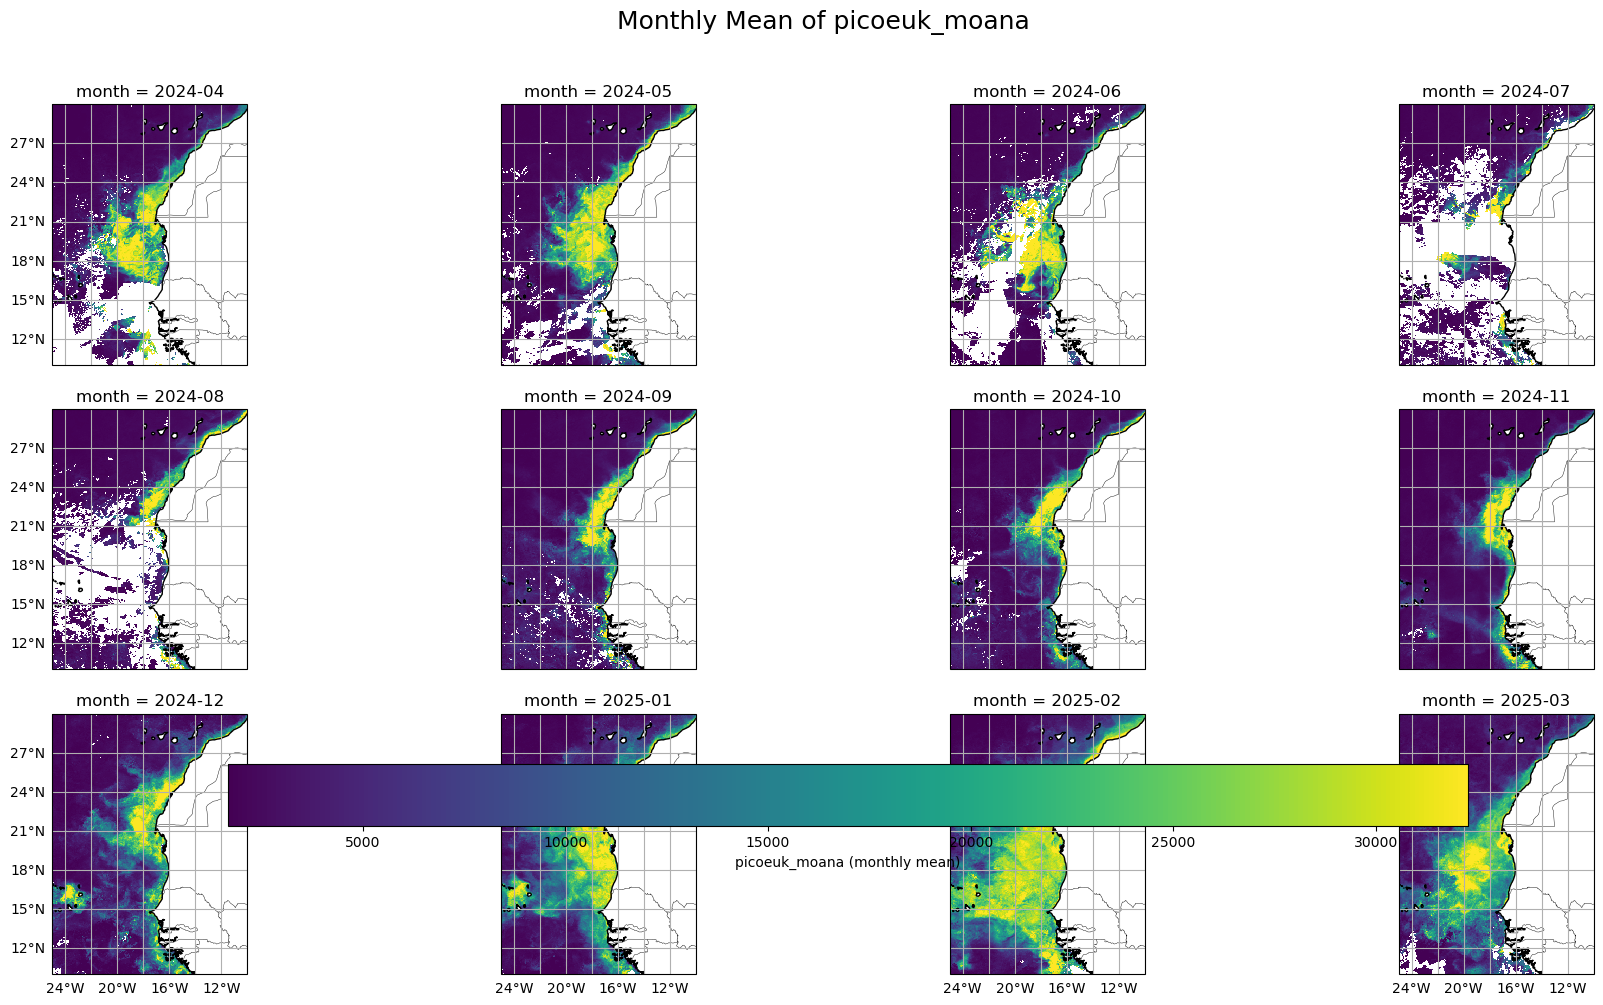

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar

# ---- Settings ----
variable = "picoeuk_moana"
ds = monthly_mean  # your Dataset with time dimension labeled as datetime (not strings)

# ---- Create figure and axes ----
fig, axs = plt.subplots(3, 4, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

# ---- Loop over months ----
for i, ax in enumerate(axs):
    # Select month i (0-based index)
    if i < len(ds.month):
        month_data = ds[variable].isel(month=i)

        ax.set_title(calendar.month_name[i + 1])
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linewidth=0.3)
        gl = ax.gridlines(draw_labels=True)
        gl.top_labels = gl.right_labels = False
        gl.bottom_labels = i > 7
        gl.left_labels = i % 4 == 0
        gl.right_labels = False

        img = month_data.plot(
            ax=ax,
            cmap="viridis",
            robust=True,
            add_colorbar=False
        )
    else:
        ax.set_visible(False)

# ---- Add one colorbar for all ----
cbar = plt.colorbar(img, ax=axs, orientation='horizontal', pad=0.05, shrink=0.8)
cbar.set_label(f"{variable} (monthly mean)")

plt.suptitle(f"Monthly Mean of {variable}", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()